# IMPORTING NECESSARY LIBRARIES

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

LOADING DATASET

In [3]:
# Upload the file
uploaded = files.upload()
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
# Display the first few rows of the dataset
df.head(10)

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# DATA CLEANING & PREPROCESSING

In [4]:
# Check for missing values
print(df.isnull().sum())
# Fill missing values in 'Age' with the mean age
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
# Renaming columns for better readability
df.columns = ["CustomerID", "Gender", "Age", "AnnualIncome", "SpendingScore"]
# Fill missing values in 'Gender' with the mode
mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace=True)
# Confirm there are no missing values
print(df.isnull().sum())
# Data transformation (e.g., encoding categorical variables)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# Display summary statistics
df.describe()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


,CustomerID,Gender,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


# EDA

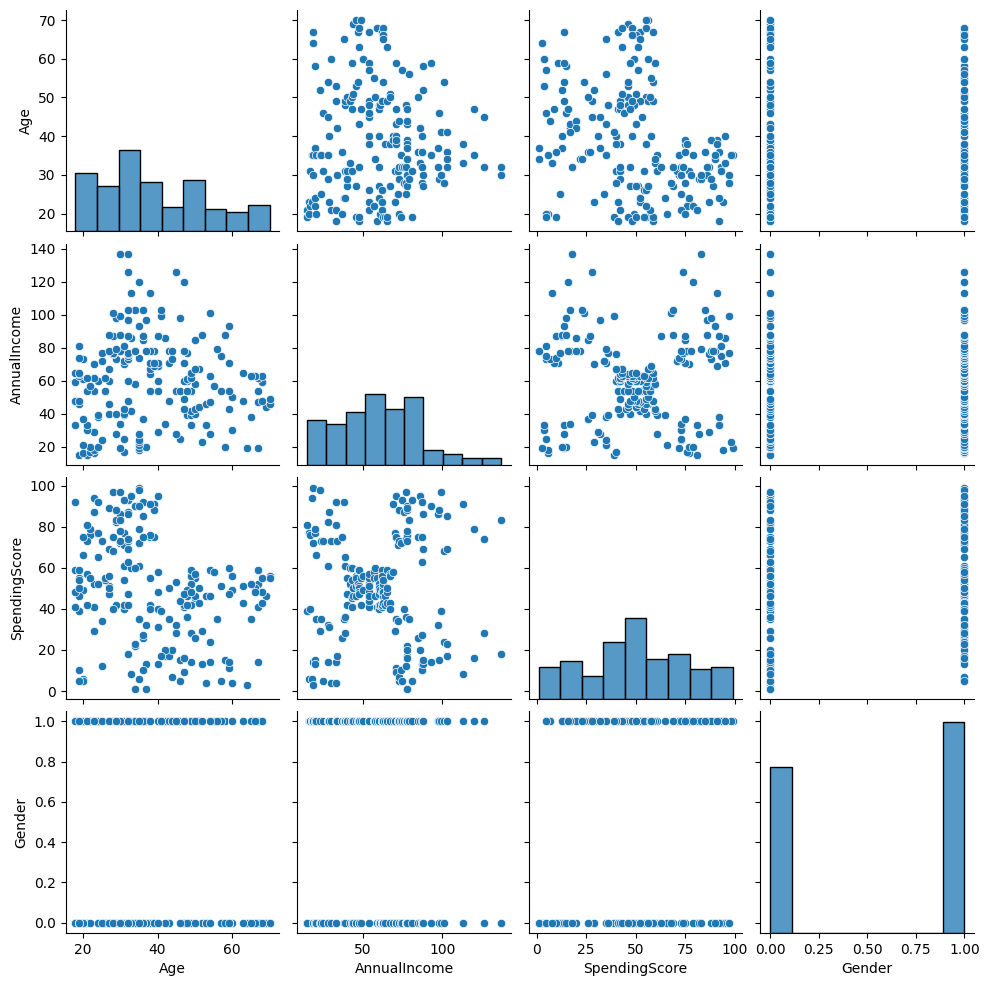

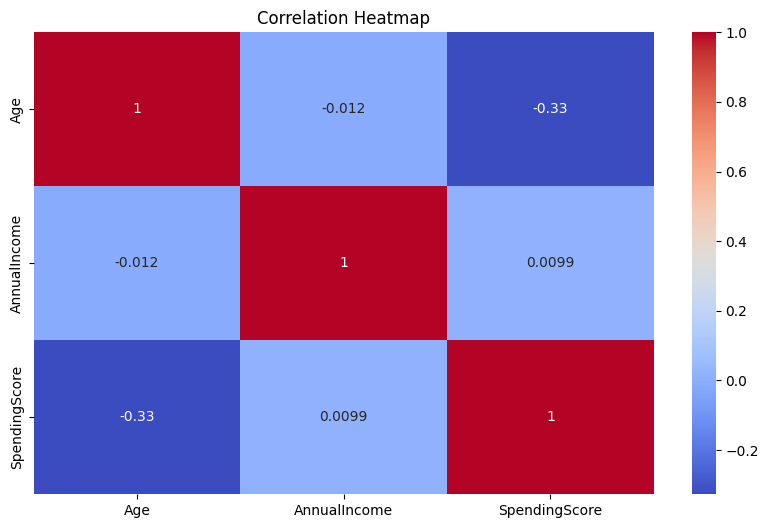

In [5]:
# Pairplot
sns.pairplot(df[['Age', 'AnnualIncome', 'SpendingScore', 'Gender']])
plt.show()
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age', 'AnnualIncome', 'SpendingScore']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# DATA VISUALIZATION

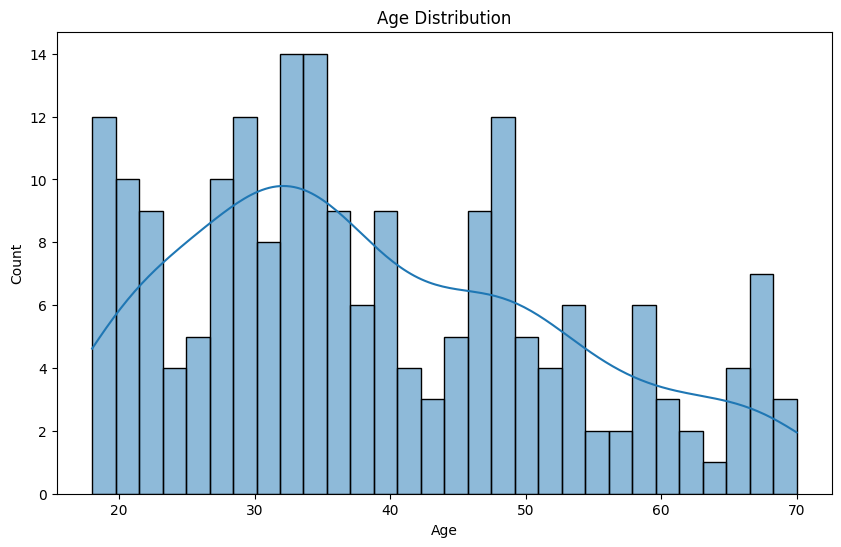

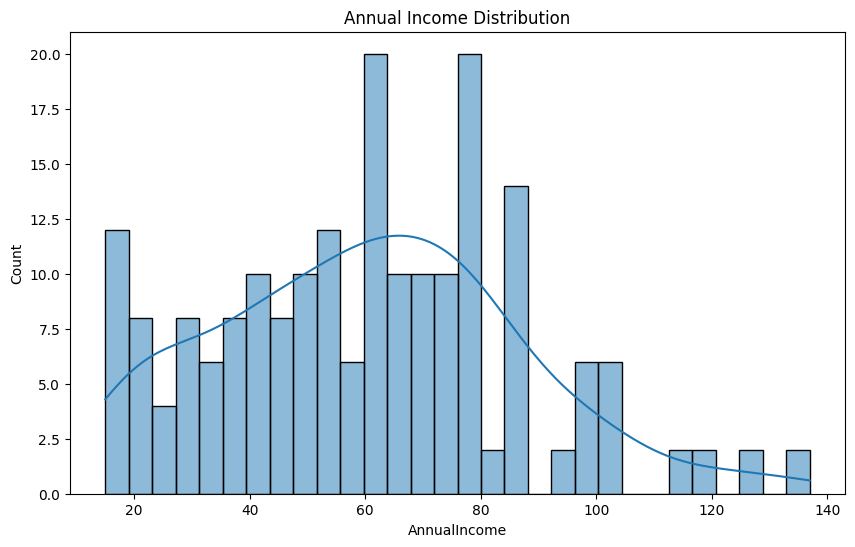

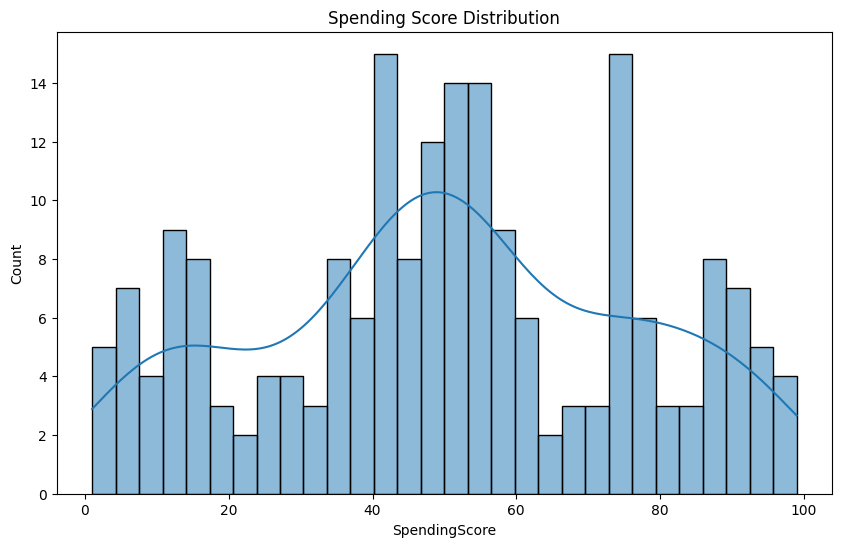

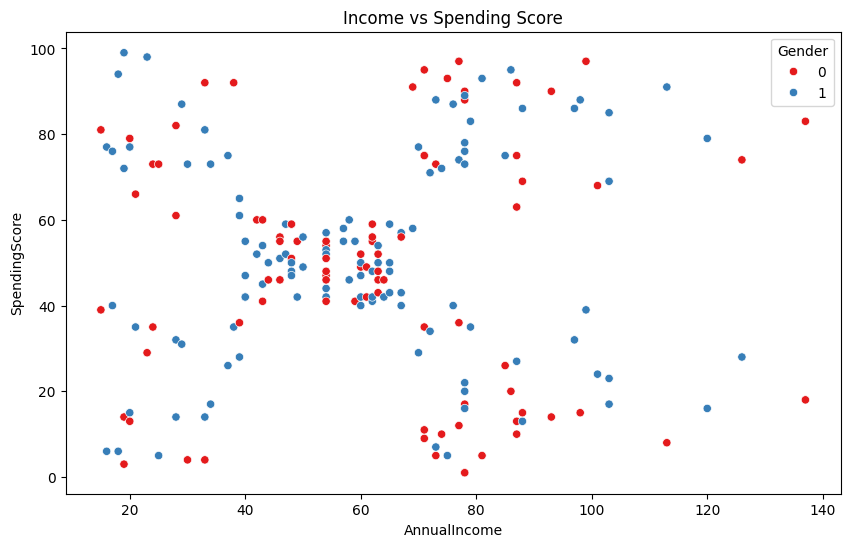

In [6]:
# Visualizing distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['AnnualIncome'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['SpendingScore'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()
# Visualizing relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Gender', palette='Set1')
plt.title('Income vs Spending Score')
plt.show()

# FEATURE ENGINEERING

In [7]:
# Creating age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
# Creating income brackets
df['IncomeBracket'] = pd.cut(df['AnnualIncome'], bins=[0, 30, 60, 90, 120, 150], labels=['0-30k', '31-60k', '61-90k', '91-120k', '121-150k'])
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,AgeGroup,IncomeBracket
0,1,0,19,15,39,0-20,0-30k
1,2,0,21,15,81,21-40,0-30k
2,3,1,20,16,6,0-20,0-30k
3,4,1,23,16,77,21-40,0-30k
4,5,1,31,17,40,21-40,0-30k


# CLUSTERING AND ELBOW METHOD

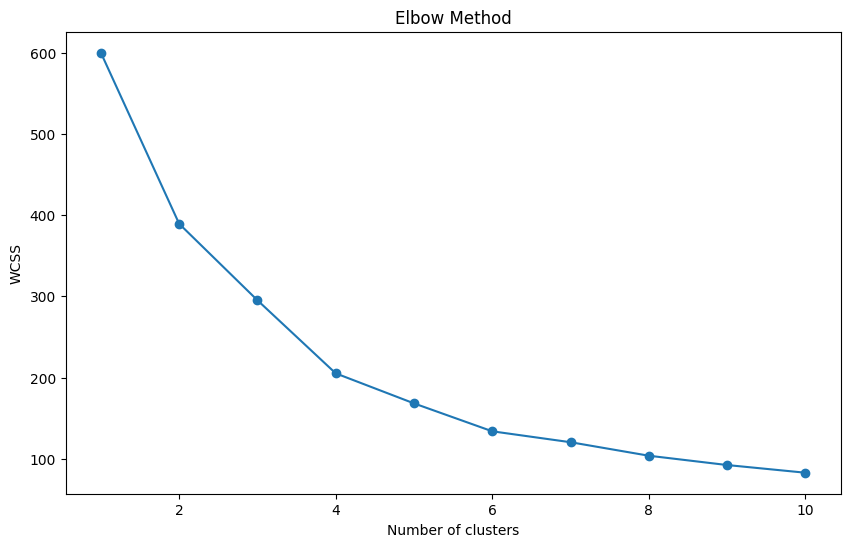

In [8]:
# Feature selection
features = df[['Age', 'AnnualIncome', 'SpendingScore']]
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# APPLYING K-MEANS CLUSTERING

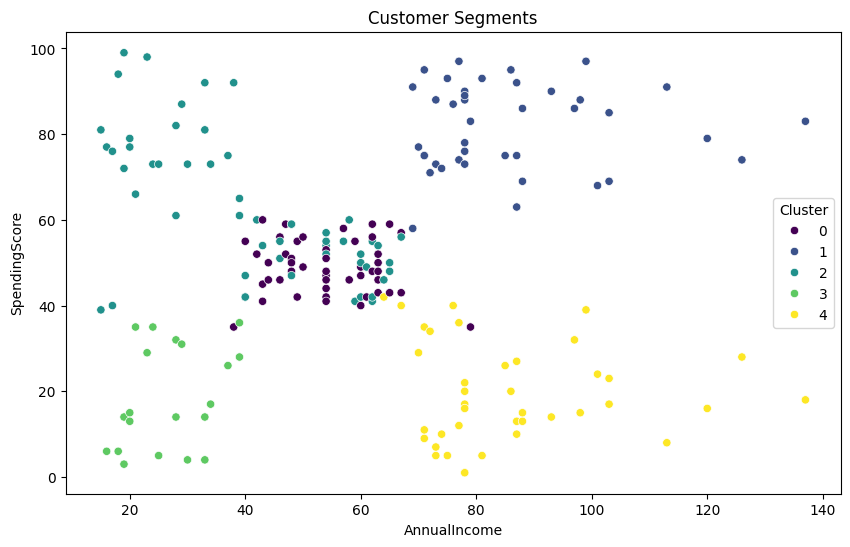

In [9]:
# Applying K-Means clustering with optimal number of clusters
optimal_clusters = 5  # Adjust based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

# CLUSTER ANALYSIS

Cluster 0 Summary:
       CustomerID     Gender        Age  AnnualIncome  SpendingScore  Cluster
count   47.000000  47.000000  47.000000     47.000000      47.000000     47.0
mean    83.872340   0.574468  55.638298     54.382979      48.851064      0.0
std     24.425234   0.499769   8.913657      8.818344       6.303825      0.0
min     41.000000   0.000000  40.000000     38.000000      35.000000      0.0
25%     64.500000   0.000000  49.000000     47.500000      44.500000      0.0
50%     81.000000   1.000000  54.000000     54.000000      48.000000      0.0
75%    102.500000   1.000000  65.000000     62.000000      54.000000      0.0
max    161.000000   1.000000  70.000000     79.000000      60.000000      0.0


Cluster 1 Summary:
       CustomerID     Gender        Age  AnnualIncome  SpendingScore  Cluster
count    40.00000  40.000000  40.000000     40.000000      40.000000     40.0
mean    161.02500   0.550000  32.875000     86.100000      81.525000      1.0
std      23.33863   0.50

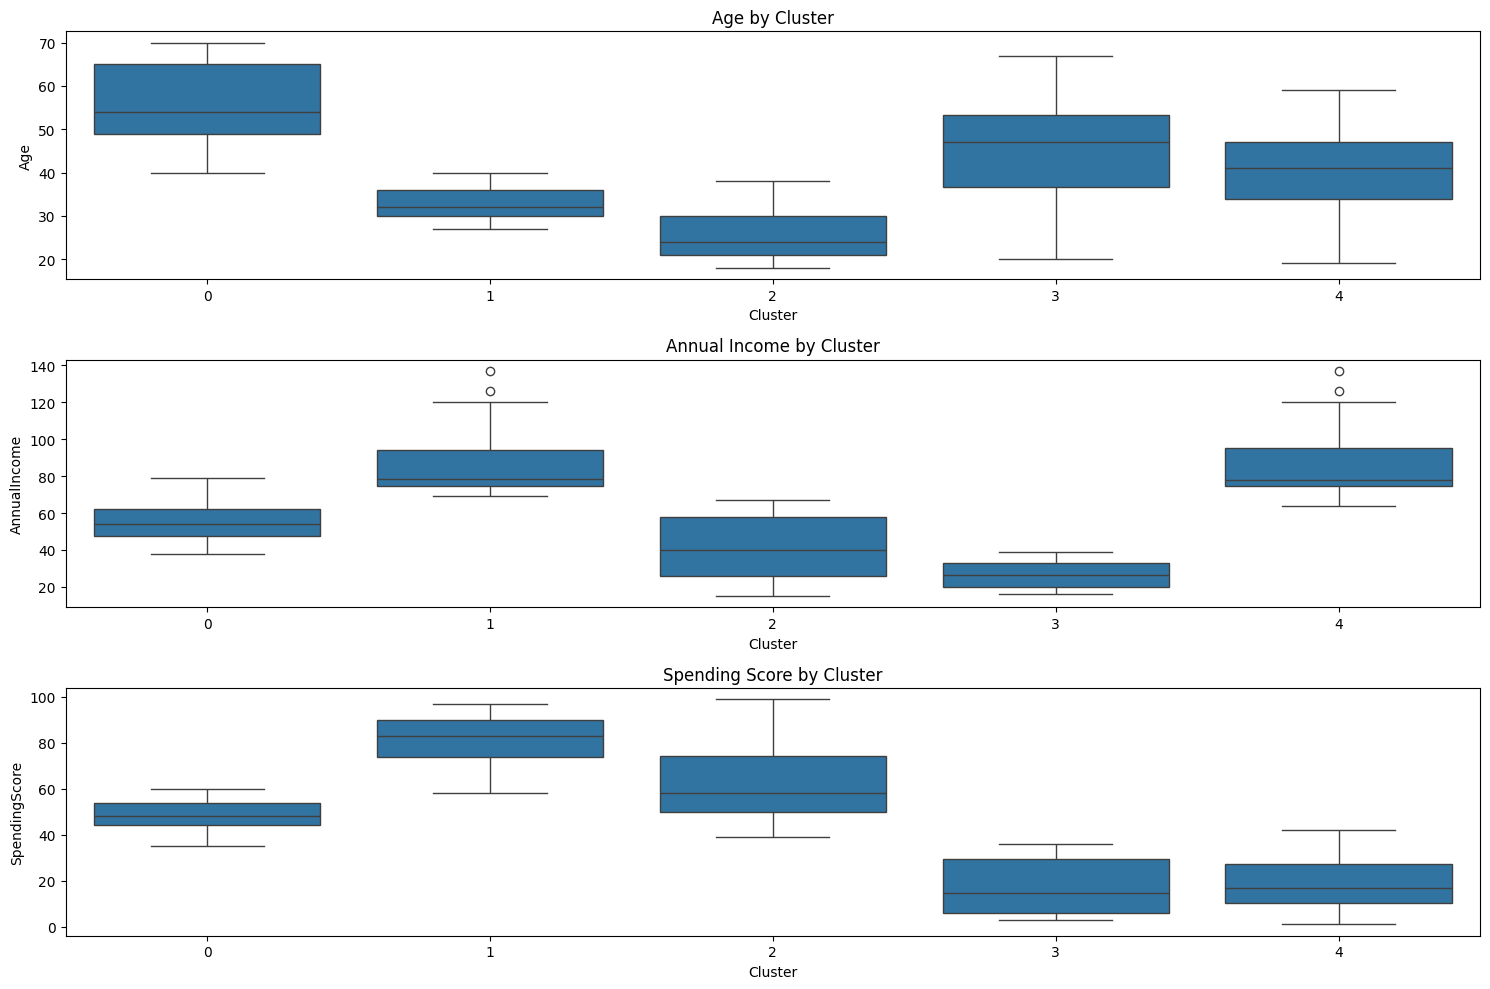

In [10]:
# Detailed analysis of each cluster
for i in range(optimal_clusters):
    print(f"Cluster {i} Summary:")
    print(df[df['Cluster'] == i].describe())
    print("\n")
# Box plots for each feature by cluster
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age by Cluster')
plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='AnnualIncome', data=df)
plt.title('Annual Income by Cluster')
plt.subplot(3, 1, 3)
sns.boxplot(x='Cluster', y='SpendingScore', data=df)
plt.title('Spending Score by Cluster')
plt.tight_layout()
plt.show()